In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
import json
import glob
import pandas as pd

In [72]:
#project_dir="results/projects/240117llama7b"
#project_dir="results/projects/240122llama2_13b_self_reasoning_10/"
#project_dir="results/projects/240119mixtral_self_reasoning_10/"

project_dir="results/projects/240122llama2_7b_self_reasoning_10/"
#project_dir="results/projects/240124mixtral_self_reasoning_err10_10/"

In [73]:
result_list=[]

def load_data(project_dir,prefix="test_"):
    for path in glob.glob(f"{project_dir}/eval/{prefix}*.json"):
        #load eval data
        with open(path,"r") as f:
            d=(json.load(f))

        generation=path.split("/")[-1].split("_")[1]
        generation=int(generation)

        mode=path.split("/")[-1].split("_")[0]
        d["generation"]=generation
        d["mode"]=mode

        #count self_reasoning data
        self_reasoning_records=0
        for gen in range(0,generation+1):
            self_reasoning_records+=len(glob.glob(f"{project_dir}/self_reasoning/{gen}_*.json"))

        d["Self-reasoning records"]=self_reasoning_records
        result_list.append(d)

    return result_list

#train_result_list=load_data(project_dir,"train_")
#test_result_list=load_data(project_dir,"test_")
result_list=load_data(project_dir,"")

In [74]:
result_df=pd.DataFrame(result_list)
result_df

,MSE,MAE,R2,Answer ratio,plot,generation,mode,Self-reasoning records
0,21074.032969,118.388542,-1.457251,0.96,"[{'name': '2-phenylacetanilide', 'smiles': 'O=...",5,test,797
1,13669.207806,89.727551,-0.717139,0.98,"[{'name': '2-phenylacetanilide', 'smiles': 'O=...",11,test,1785
2,17965.308520,99.096939,-1.361748,0.98,"[{'name': 'cyanoacetamide', 'smiles': 'C(C#N)C...",7,train,1101
3,13789.739235,92.250000,-0.633979,0.98,"[{'name': '2-phenylacetanilide', 'smiles': 'O=...",10,test,1602
4,15143.053750,94.393750,-0.715886,0.96,"[{'name': 'tri-n-butyl phosphate', 'smiles': '...",6,train,941
5,10795.117500,68.204000,-0.256472,1.00,"[{'name': '3,3,3-trifluoro-2-hydroxy-2-(triflu...",11,train,1785
6,8637.596250,67.861000,-0.066490,1.00,"[{'name': '9H-Xanthen-9-ol', 'smiles': 'OC1c3c...",10,train,1602
7,8239.688830,64.010638,-0.232339,0.94,"[{'name': 'diethyl 4-(4-fluorophenyl)-2,6-dihy...",12,train,1966
8,15958.356739,94.826087,-0.913870,0.92,"[{'name': 'imidodicarbonimidic diamide, n-(4-c...",4,train,661
9,10790.382100,75.338000,-0.232823,1.00,"[{'name': 'isopropyl acetate', 'smiles': 'CC(C...",13,train,2129


<Axes: xlabel='generation', ylabel='MSE'>

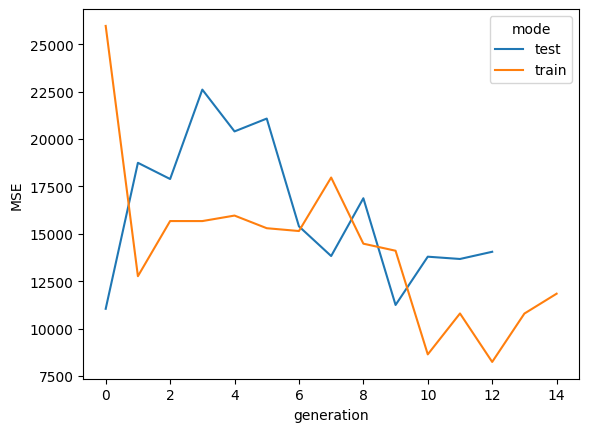

In [79]:
sns.lineplot(x="generation",y="MSE",hue="mode",data=result_df[result_df["MSE"]<40000])

#plt.ylim(4000,12000)

<Axes: xlabel='generation', ylabel='MSE'>

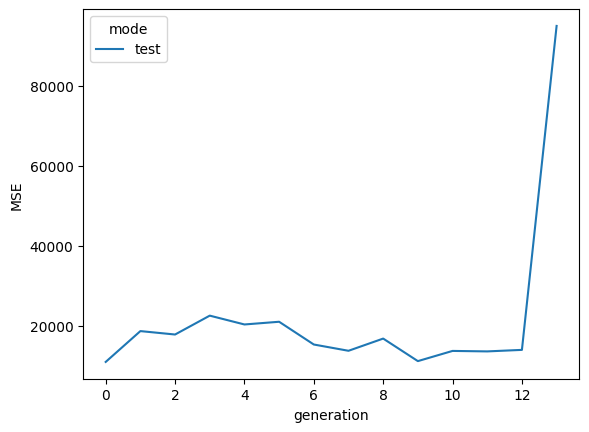

In [76]:
sns.lineplot(x="generation",y="MSE",hue="mode",data=result_df[result_df["mode"]=="test"])

<Axes: xlabel='Self-reasoning records', ylabel='MSE'>

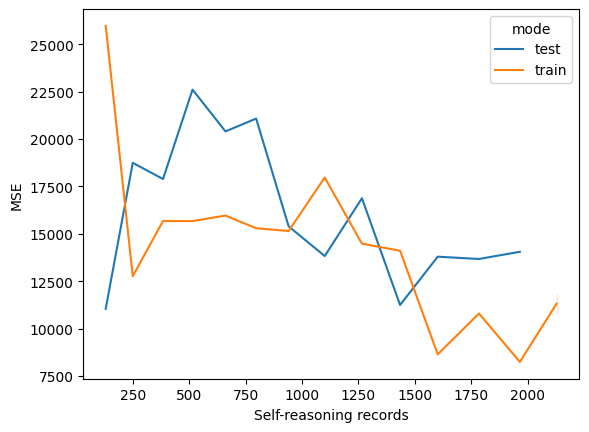

In [80]:

sns.lineplot(x="Self-reasoning records",y="MSE",hue="mode",data=result_df[result_df["MSE"]<40000])

<Axes: xlabel='generation', ylabel='Self-reasoning records'>

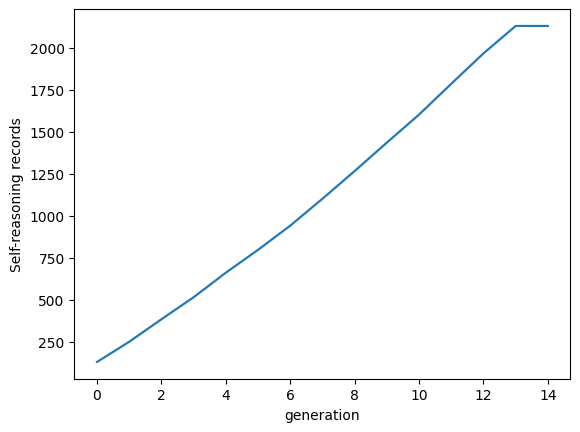

In [78]:

sns.lineplot(x="generation",y="Self-reasoning records",data=result_df)